## Load dataset

In [4]:
import pandas as pd

#load the Excel file

ds = pd.read_excel(r"C:\Users\user\Downloads\online+retail\Online Retail.xlsx")




In [6]:
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
ds.describe(include='all')

C:\Users\user\AppData\Local\Temp\ipykernel_7588\1134107822.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Checking for missing value

In [14]:
ds.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Handling missing values and Duplicates

In [20]:
## Remove duplicates

ds = ds.drop_duplicates()


## Fill missing values for categorical column with the mode
ds['Description'].fillna(ds['Description'].mode()[0], inplace=True)
ds['CustomerID'].fillna(ds['CustomerID'].mode()[0], inplace=True)

## Verify if there are still any missing value

ds.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


## Analysis


In [28]:
## Convert columns to appropriate data types if neccesarry

ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'])

In [35]:
#Customer Lifetime Value (CLTV) Analysis
#Calculate total revenue per customer
ds['TotalRevenue'] = ds['Quantity'] * ds['UnitPrice']
cltv = ds.groupby('CustomerID').agg({
    'TotalRevenue': 'sum',
    'InvoiceNo': 'count',
    'InvoiceDate': lambda x: (x.max() - x.min()).days
}).reset_index()

cltv.columns = ['CustomerID', 'TotalRevenue', 'TotalTransactions', 'CustomerLifespanDays']

# Average revenue per transaction
cltv['AvgRevenuePerTransaction'] = cltv['TotalRevenue'] / cltv['TotalTransactions']

# Average transactions per day
cltv['TransactionsPerDay'] = cltv['TotalTransactions'] / cltv['CustomerLifespanDays']

print(cltv.head())


   CustomerID  TotalRevenue  TotalTransactions  CustomerLifespanDays  \
0     12346.0          0.00                  2                     0   
1     12347.0       4310.00                182                   365   
2     12348.0       1797.24                 31                   282   
3     12349.0       1757.55                 73                     0   
4     12350.0        334.40                 17                     0   

   AvgRevenuePerTransaction  TransactionsPerDay  
0                  0.000000                 inf  
1                 23.681319            0.498630  
2                 57.975484            0.109929  
3                 24.076027                 inf  
4                 19.670588                 inf  


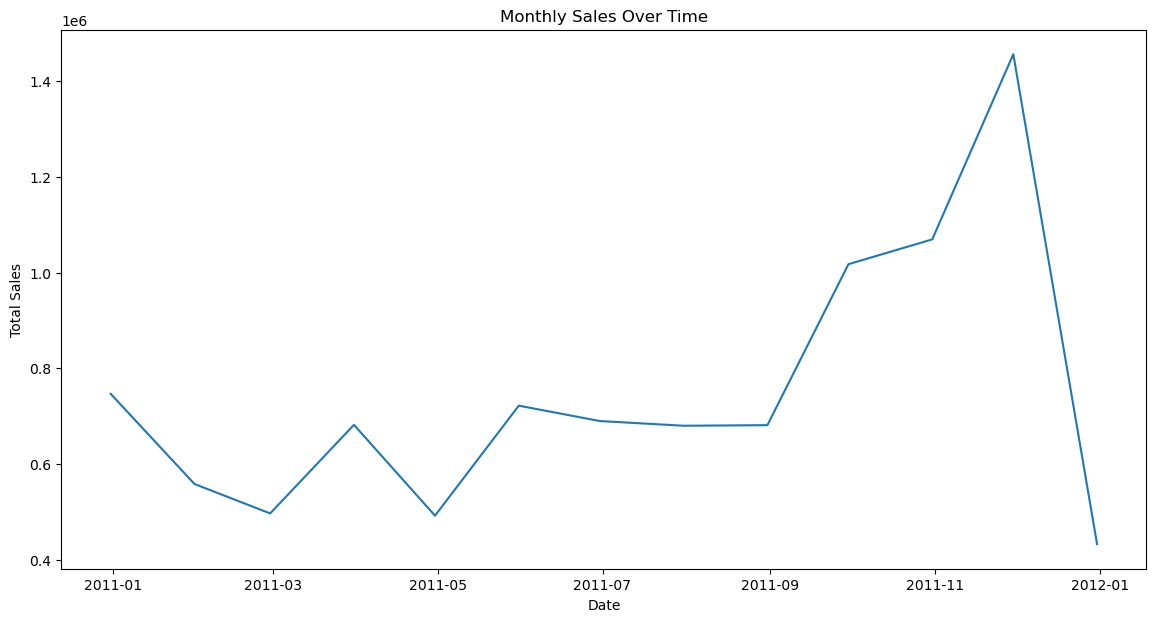

In [40]:
## Time Series Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Resample sales data by month
monthly_sales = ds.resample('M', on='InvoiceDate')['TotalRevenue'].sum()

# Plot the time series
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [44]:
## Market Total Sales per Country

sales_by_country = ds.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)

print(sales_by_country)



Country
United Kingdom          8167128.184
Netherlands              284661.540
EIRE                     262993.380
Germany                  221509.470
France                   197317.110
Australia                137009.770
Switzerland               56363.050
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  29302.970
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Hong Kong                  9908.240
Singapore                  9120.390
Israel                     7901.970
Poland                     7213.140
Unspecified                4740.940
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

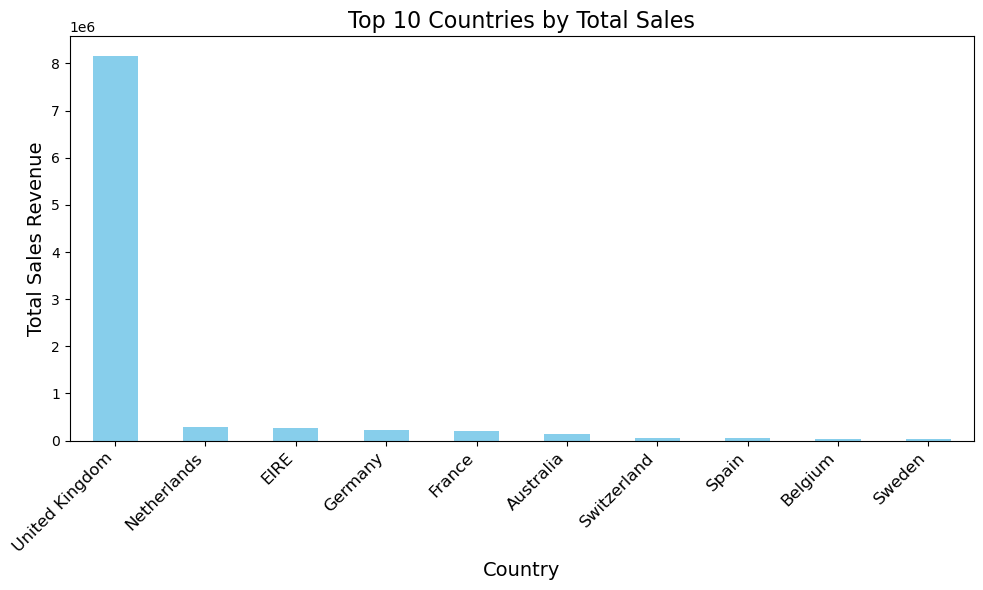

In [47]:
import matplotlib.pyplot as plt

# Get the top 10 countries by total sales
top_10_countries = sales_by_country.head(10)

# Plot the bar chart
top_10_countries.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add titles and labels
plt.title('Top 10 Countries by Total Sales', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Sales Revenue', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


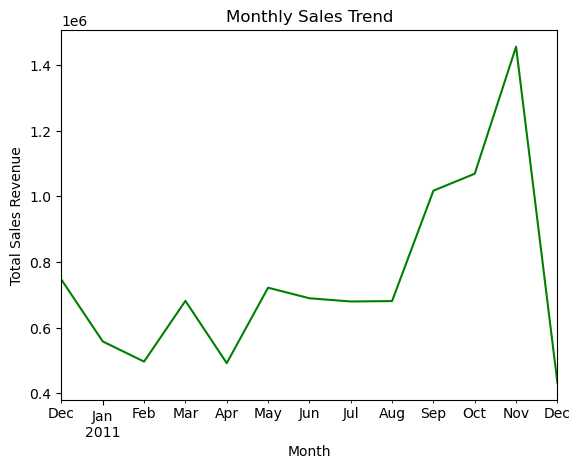

In [49]:
# Monthly Sales Trend

monthly_sales.plot(kind='line', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.show()



count      4372.000000
mean        122.744968
std        2168.043180
min           1.000000
25%          17.000000
50%          41.000000
75%          99.250000
max      142849.000000
Name: InvoiceNo, dtype: float64


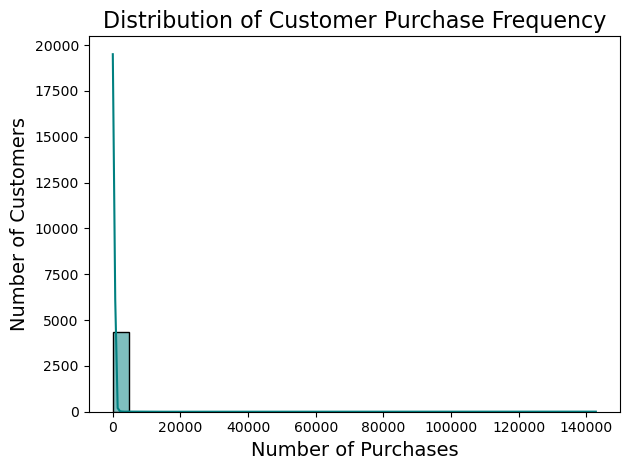

In [63]:
## Customer Purchase Frequency
purchase_frequency = ds.groupby('CustomerID')['InvoiceNo'].count()

print(purchase_frequency.describe())



import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the histogram
sns.histplot(purchase_frequency, bins=30, kde=True, color='teal', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Customer Purchase Frequency', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


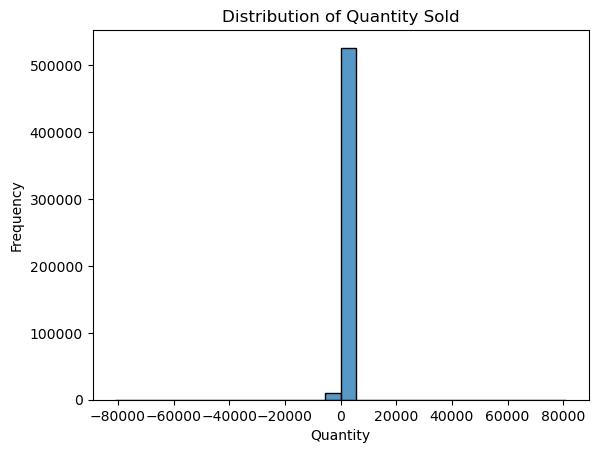

In [59]:
## Distribution of Quantity Sold

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(ds['Quantity'], bins=30, kde=False)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


In [61]:
## Most Common Purchase Day of the Week

ds['DayOfWeek'] = ds['InvoiceDate'].dt.day_name()
purchases_by_day = ds['DayOfWeek'].value_counts()

print(purchases_by_day)


Thursday     103056
Tuesday      101064
Monday        94435
Wednesday     93715
Friday        81565
Sunday        62806
Name: DayOfWeek, dtype: int64


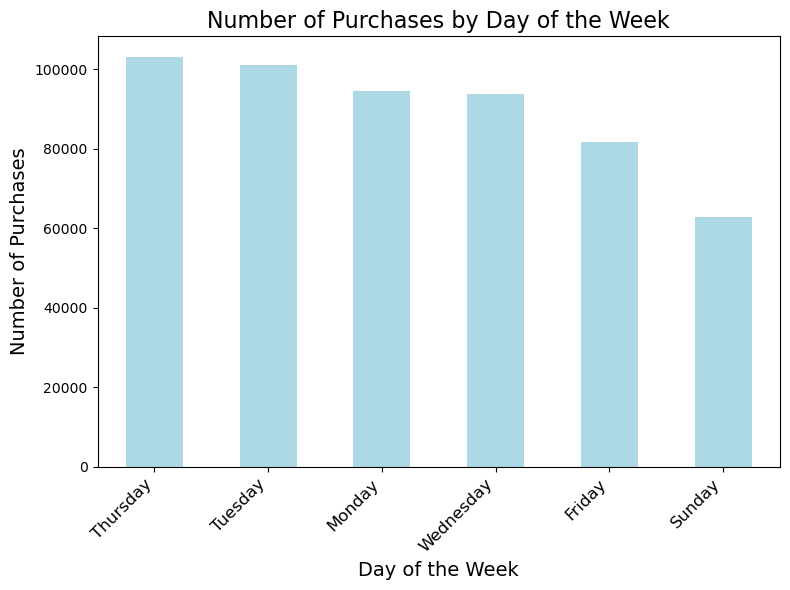

In [64]:
import matplotlib.pyplot as plt

# Assuming purchases_by_day is a Series object
purchases_by_day.plot(kind='bar', color='lightblue', figsize=(8, 6))

# Add titles and labels
plt.title('Number of Purchases by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


In [66]:
## Most Sold Product

top_products = ds.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

print(top_products)


Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
VICTORIAN GLASS HANGING T-LIGHT       23825
Name: Quantity, dtype: int64


Thursday     103056
Tuesday      101064
Monday        94435
Wednesday     93715
Friday        81565
Sunday        62806
Name: DayOfWeek, dtype: int64


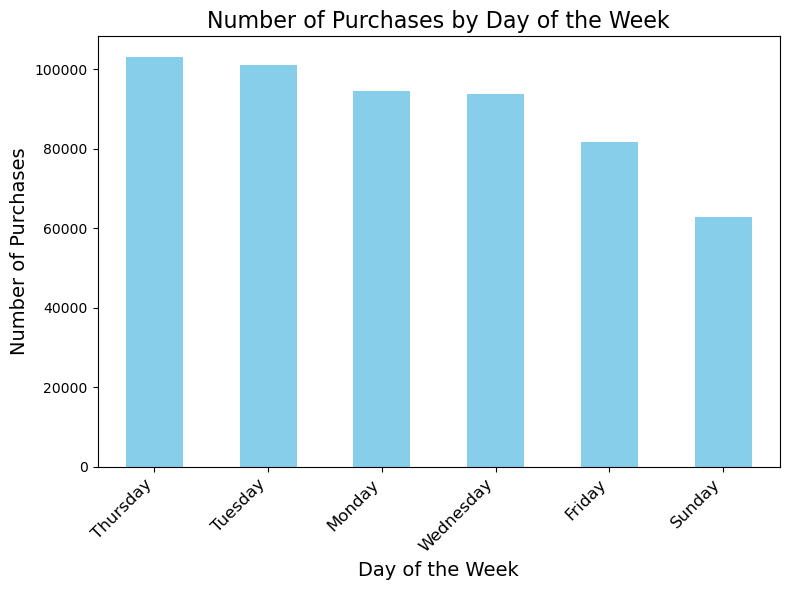

In [68]:
#Most Common Purchase Day of the week

ds['DayOfWeek'] = ds['InvoiceDate'].dt.day_name()
purchases_by_day = ds['DayOfWeek'].value_counts()

print(purchases_by_day)


import matplotlib.pyplot as plt

# Plotting the bar chart
purchases_by_day.plot(kind='bar', color='skyblue', figsize=(8, 6))

# Adding titles and labels
plt.title('Number of Purchases by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Purchases', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


